In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#学習データ、学習ラベル、テストデータ、テストラベルにデータセットを入れる
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
#学習ラベル、テストラベルをone hot表現にする
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_labels_onehot = keras.utils.to_categorical(train_labels, 10)
test_labels_onehot = keras.utils.to_categorical(test_labels, 10)

In [4]:
#0~255までなので0~1の範囲にする
train_images = train_images.astype("float32") / 255.0
 
test_images = test_images.astype("float32") / 255.0

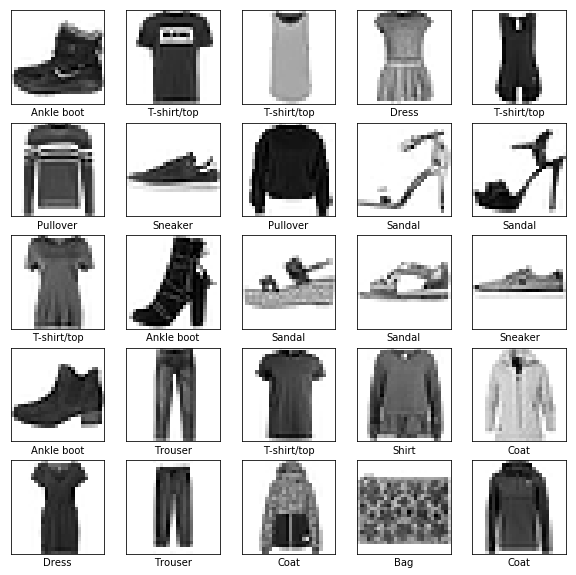

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="relu", input_shape=(28,28,1)),#畳み込み層
    keras.layers.MaxPooling2D(pool_size=(2,2)),#Maxpoolinを行う
    keras.layers.Dropout(0.3),#Dropout層
 
    keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
 
    keras.layers.Flatten(),#8*8の二次元配列を64要素の一次元配列に直す
    keras.layers.Dense(256, activation="relu"),#全結合層
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,  activation="softmax")
])

W0705 14:04:57.516566 4607468992 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(optimizer=tf.train.AdamOptimizer(),#NNの学習を効率的に行ってくれる
              loss='categorical_crossentropy',#損失関数
              metrics=["accuracy"])

In [8]:
model.fit(
    train_images[:,:,:,None],
    train_labels_onehot,
    epochs=20,
    batch_size=64,
)

Epoch 1/20
60000/60000 [==============================] - 39s 654us/sample - loss: 0.5937 - acc: 0.7815
Epoch 2/20
60000/60000 [==============================] - 40s 667us/sample - loss: 0.4108 - acc: 0.8518
Epoch 3/20
60000/60000 [==============================] - 40s 670us/sample - loss: 0.3674 - acc: 0.8676
Epoch 4/20
60000/60000 [==============================] - 42s 701us/sample - loss: 0.3461 - acc: 0.8749
Epoch 5/20
60000/60000 [==============================] - 43s 717us/sample - loss: 0.3224 - acc: 0.8822
Epoch 6/20
60000/60000 [==============================] - 46s 759us/sample - loss: 0.3074 - acc: 0.8866
Epoch 7/20
60000/60000 [==============================] - 50s 839us/sample - loss: 0.2919 - acc: 0.8917
Epoch 8/20
60000/60000 [==============================] - 52s 866us/sample - loss: 0.2885 - acc: 0.8943
Epoch 9/20
60000/60000 [==============================] - 54s 899us/sample - loss: 0.2786 - acc: 0.8979
Epoch 10/20
60000/60000 [==============================] - 55s 9

In [9]:
labels = model.predict(test_images[:,:,:,None])

In [10]:
score = model.evaluate(test_images[:,:,:,None], test_labels_onehot)

10000/10000 [==============================] - 1s 139us/sample - loss: 0.2390 - acc: 0.9158


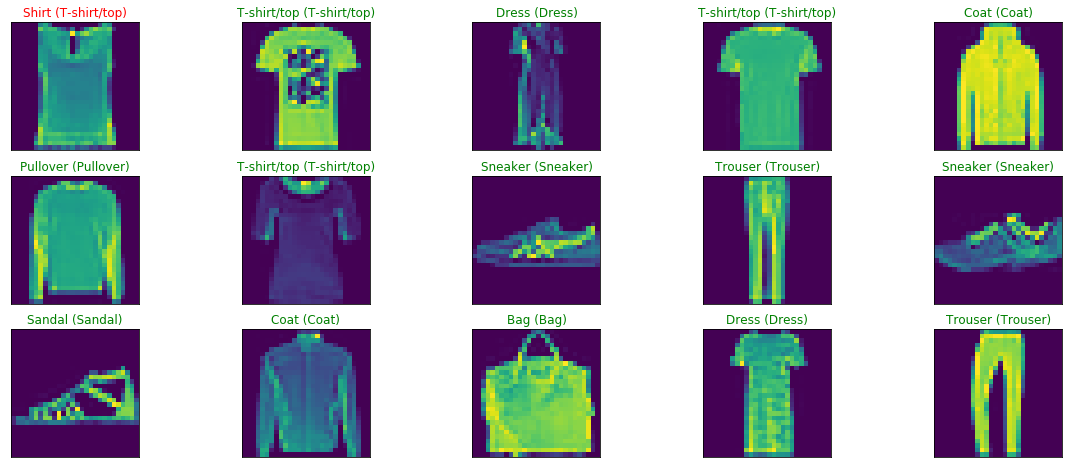

In [11]:
#正解は緑色、不正解は赤色
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
 
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(labels[index])
    true_index = np.argmax(test_labels_onehot[index])
 
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="relu", input_shape=(28,28,1)),#畳み込み層
    keras.layers.MaxPooling2D(pool_size=(2,2)),#Maxpoolinを行う
    keras.layers.Dropout(0.3),#Dropout層
 
    keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(filters=16, kernel_size=2, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(filters=8, kernel_size=2, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
 
    keras.layers.Flatten(),#8*8の二次元配列を64要素の一次元配列に直す
    keras.layers.Dense(256, activation="relu"),#全結合層
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,  activation="softmax")
])

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(),#NNの学習を効率的に行ってくれる
              loss='categorical_crossentropy',#損失関数
              metrics=["accuracy"])

In [14]:
model.fit(
    train_images[:,:,:,None],
    train_labels_onehot,
    epochs=20,
    batch_size=64,
)

Epoch 1/20
60000/60000 [==============================] - 41s 681us/sample - loss: 1.4949 - acc: 0.4016
Epoch 2/20
60000/60000 [==============================] - 45s 753us/sample - loss: 1.1214 - acc: 0.5561
Epoch 3/20
60000/60000 [==============================] - 44s 731us/sample - loss: 1.0082 - acc: 0.6007
Epoch 4/20
60000/60000 [==============================] - 42s 705us/sample - loss: 0.9598 - acc: 0.6199
Epoch 5/20
60000/60000 [==============================] - 44s 739us/sample - loss: 0.9271 - acc: 0.6339
Epoch 6/20
60000/60000 [==============================] - 46s 774us/sample - loss: 0.9025 - acc: 0.6424
Epoch 7/20
60000/60000 [==============================] - 51s 852us/sample - loss: 0.8823 - acc: 0.6526
Epoch 8/20
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.8810 - acc: 0.6577
Epoch 9/20
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.8660 - acc: 0.6640
Epoch 10/20
60000/60000 [==============================] - 73s 1ms/s

In [15]:
labels = model.predict(test_images[:,:,:,None])

In [16]:
score = model.evaluate(test_images[:,:,:,None], test_labels_onehot)

10000/10000 [==============================] - 2s 194us/sample - loss: 0.7346 - acc: 0.7307


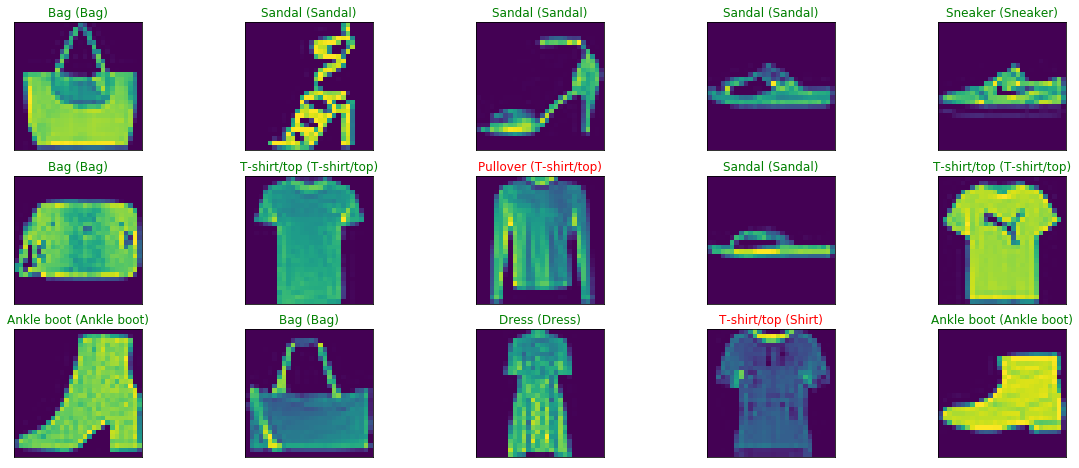

In [17]:
#正解は緑色、不正解は赤色
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
 
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(labels[index])
    true_index = np.argmax(test_labels_onehot[index])
 
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="sigmoid", input_shape=(28,28,1)),#畳み込み層
    keras.layers.MaxPooling2D(pool_size=(2,2)),#Maxpoolinを行う
    keras.layers.Dropout(0.3),#Dropout層
 
    keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="sigmoid"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
 
    keras.layers.Flatten(),#8*8の二次元配列を64要素の一次元配列に直す
    keras.layers.Dense(256, activation="relu"),#全結合層
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,  activation="softmax")
])

In [19]:
model.compile(optimizer=tf.train.AdamOptimizer(),#NNの学習を効率的に行ってくれる
              loss='categorical_crossentropy',#損失関数
              metrics=["accuracy"])

In [21]:
model.fit(
    train_images[:,:,:,None],
    train_labels_onehot,
    epochs=20,
    batch_size=64,
)

Epoch 1/20
60000/60000 [==============================] - 57s 948us/sample - loss: 2.3077 - acc: 0.0979
Epoch 2/20
60000/60000 [==============================] - 55s 908us/sample - loss: 2.3027 - acc: 0.0973
Epoch 3/20
60000/60000 [==============================] - 57s 953us/sample - loss: 2.3027 - acc: 0.0998
Epoch 4/20
60000/60000 [==============================] - 59s 977us/sample - loss: 2.3027 - acc: 0.0983
Epoch 5/20
60000/60000 [==============================] - 68s 1ms/sample - loss: 2.3027 - acc: 0.0975
Epoch 6/20
60000/60000 [==============================] - 87s 1ms/sample - loss: 2.3027 - acc: 0.0998
Epoch 7/20
60000/60000 [==============================] - 65s 1ms/sample - loss: 2.3027 - acc: 0.0988
Epoch 8/20
60000/60000 [==============================] - 65s 1ms/sample - loss: 2.3027 - acc: 0.0996
Epoch 9/20
60000/60000 [==============================] - 68s 1ms/sample - loss: 1.8204 - acc: 0.2779
Epoch 10/20
60000/60000 [==============================] - 68s 1ms/sample 

In [22]:
labels = model.predict(test_images[:,:,:,None])

In [23]:
score = model.evaluate(test_images[:,:,:,None], test_labels_onehot)

10000/10000 [==============================] - 2s 223us/sample - loss: 0.4844 - acc: 0.8226


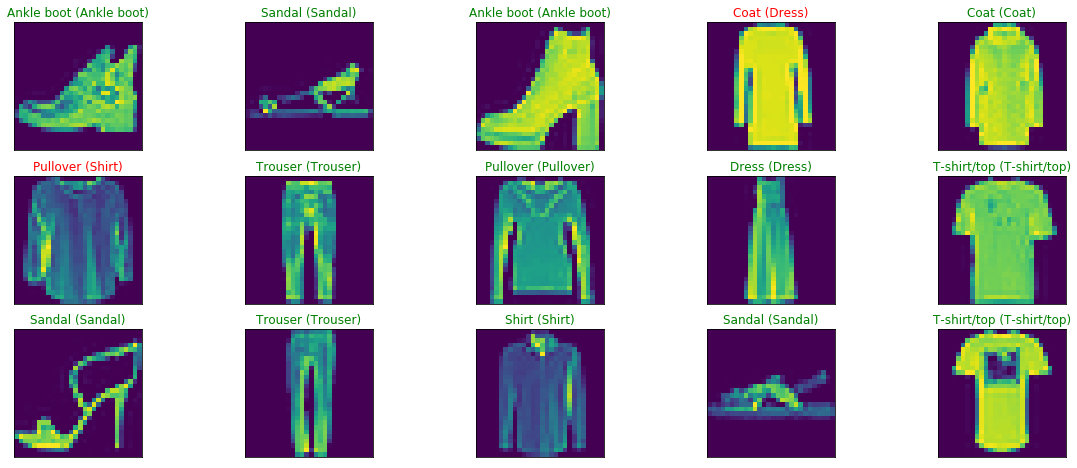

In [24]:
#正解は緑色、不正解は赤色
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
 
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(labels[index])
    true_index = np.argmax(test_labels_onehot[index])
 
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [25]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="relu", input_shape=(28,28,1)),#畳み込み層
    keras.layers.MaxPooling2D(pool_size=(2,2)),#Maxpoolinを行う
    keras.layers.Dropout(0.3),#Dropout層
 
    keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
 
    keras.layers.Flatten(),#8*8の二次元配列を64要素の一次元配列に直す
    keras.layers.Dense(256, activation="relu"),#全結合層
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,  activation="softmax")
])

In [30]:
model.compile(optimizer='sgd',#NNの学習を効率的に行ってくれる
              loss='categorical_crossentropy',#損失関数
              metrics=["accuracy"])

In [31]:
model.fit(
    train_images[:,:,:,None],
    train_labels_onehot,
    epochs=20,
    batch_size=64,
)

Epoch 1/20
60000/60000 [==============================] - 48s 800us/sample - loss: 1.3126 - acc: 0.5054
Epoch 2/20
60000/60000 [==============================] - 52s 874us/sample - loss: 0.8376 - acc: 0.6784
Epoch 3/20
60000/60000 [==============================] - 56s 928us/sample - loss: 0.7469 - acc: 0.7145
Epoch 4/20
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.6939 - acc: 0.7371
Epoch 5/20
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.6478 - acc: 0.7524
Epoch 6/20
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.6144 - acc: 0.7679
Epoch 7/20
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.5923 - acc: 0.7762
Epoch 8/20
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.5704 - acc: 0.7856
Epoch 9/20
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.5533 - acc: 0.7935
Epoch 10/20
60000/60000 [==============================] - 72s 1ms/sample - 

In [32]:
labels = model.predict(test_images[:,:,:,None])
score = model.evaluate(test_images[:,:,:,None], test_labels_onehot)

10000/10000 [==============================] - 2s 194us/sample - loss: 0.3846 - acc: 0.8616


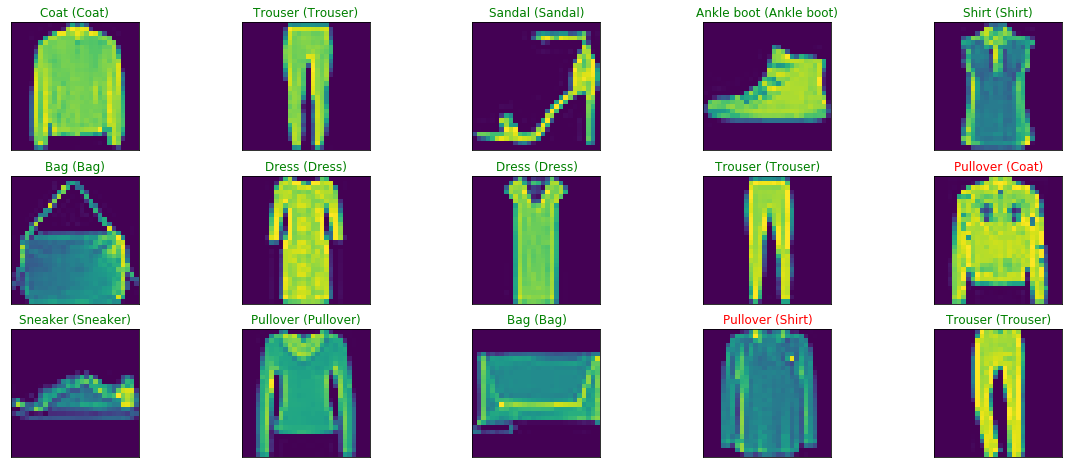

In [33]:
#正解は緑色、不正解は赤色
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
 
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(labels[index])
    true_index = np.argmax(test_labels_onehot[index])
 
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [35]:
print(train_images.shape,train_labels.shape)

(60000, 28, 28) (60000,)


In [36]:
print(test_images.shape,test_labels.shape)

(10000, 28, 28) (10000,)
